<a href="https://colab.research.google.com/github/Jaya9522/almabetter_assignments/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Understanding Neural Networks


### In simple terms, neural networks are representative of the human brain, and they are specificially made to recognize patterns. They interpret data through various models. The patterns that these models detect are all numerical specifically in the form of vectors. Artificial neural networks are computation systems that intend to imitate human learning capabilities via a complex architecture that resembles the human nervous system.

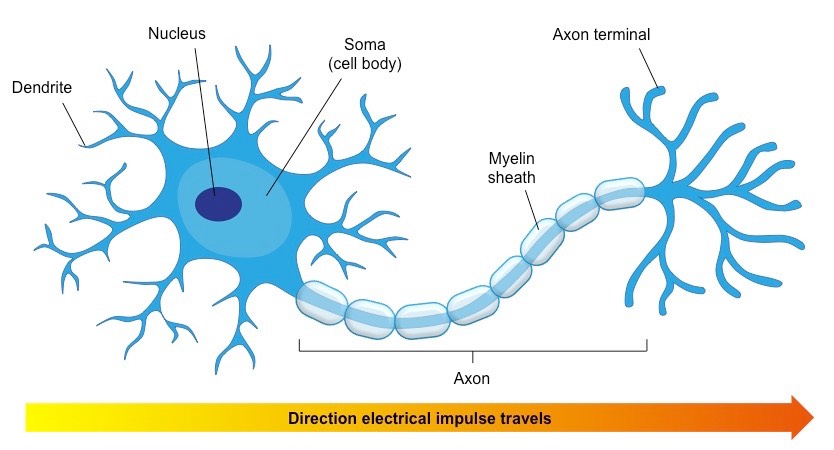

## <b> The Human Nervous System </b>

### Human nervous system consists of billions of neurons. These neurons collectively process input received from sensory organs, process the information, and decides what to do in reaction to the input. A typical neuron in the human nervous system has three main parts: dendrites, nucleus, and axons. The information passed to a neuron is received by dendrites. The nucleus is responsible for processing this information. The output of a neuron is passed to other neurons via the axon, which is connected to the dendrites of other neurons further down the network.

## <b> Perceptrons </b>

### Artificial neural networks are inspired by the human neural network architecture. The simplest neural network consists of only one neuron and is called a perceptron, as shown in the figure below:

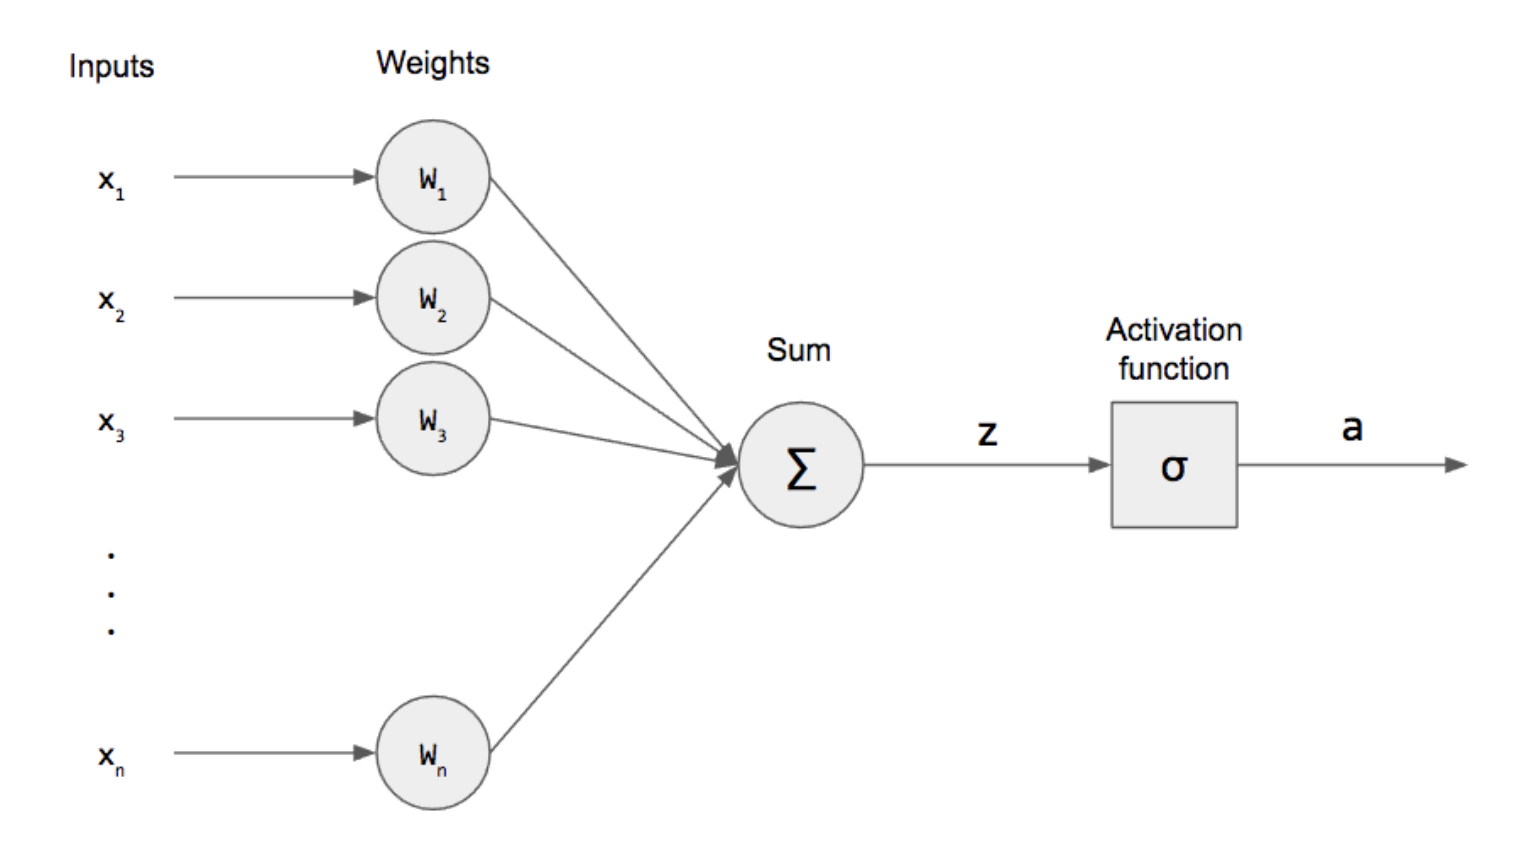

### A perceptron has one input layer and one neuron. Input layer acts as the dendrites and is responsible for receiving the inputs. The number of nodes in the input layer is equal to the number of features in the input dataset. Each input is multiplied with a weight (which is typically initialized with some random value) and the results are added together. The sum is then passed through an activation function. The activation function of a perceptron resembles the nucleus of human nervous system neuron. It processes the information and yields an output. In the case of a perceptron, this output is the final outcome. However, in the case of multilayer perceptrons, the output from the neurons in the previous layer serves as the input to the neurons of the proceeding layer.

### The Perceptron consists of two main components
* ### Neurons ($x_i$)
* ### Weights ($w_i$)

### Perceptrons represent the most basic form of a Neural Network with only two layers, the input and output layer.  As shown in the diagram above, both layers are joined by weights represented by the arrows. Each individual neuron represents a number. For example, if there are three inputs, the input layer will consist of 3 neurons plus an additional bias neuron. The importance of the bias ($b$) will become clear later. The output layer simply consists of one neuron in this scenario which represents the number we are attempting to predict. 




# <b><u> Decoding how Neural Networks work? </u></b>

## <b>Forward Propagation </b>

### The process of going from the input layer to the output is known as Forward Propagation. To simplify the computations, we will use vector notation to represent the input features and the weights.

### ${x}=\begin{bmatrix}  x_1 & x_2 & ... & x_n\end{bmatrix}$

### ${w}=\begin{bmatrix}  w_1 & w_2 & ... & w_n \end{bmatrix}$

### Finally, to get the value of the output neuron, we simply take the dot product of these two vectors and add the bias. 

### $z={x}\cdot{w}+b=x_1\times w_1+x_2\times w_2+...+x_n\times w_n+b$






## **The Bias Term**

### To get a better understanding of this output, lets analyze it with just one input neuron. In other words, our output neuron will store the following.

### $z=x_1\times w_1+b$

### If we visualize this in two dimensional space, we know that this will represent a line with slope $w_1$ and intercept $b$. We can now easily see the role of the bias. Without it, our model would always go through the origin. Now, we can shift our model along the axes giving us more flexibility while training. However, we are still only able to represent linear models. To add non-linearities to our model we use an activation function.



## **Activation Functions**

### Lets imagine that we are solving a binary classification problem. This means the range of our output $\hat{y}$ (predicted value) must be $(0, 1)$ since we are predicting a probablity that the input belongs to a certain class. However, the range of a linear equation is $(-\infty, \infty)$. Therefore, we must apply some other function to satisfy this constraint. In binary classification problems, the most common activation function is called the sigmoid function. 

### $\sigma(x)=\frac{1}{1+e^{-x}}$


<img src="https://tinyurl.com/ycggxehs" alt="sigmoid_graph" width="400"/>



### As you can see in this graph, $\sigma(x)\in(0, 1)$. This activation function makes it possible to predict a probablity for a binary output. As you go further into machine learning, you will see several other activation functions. The most common ones other than sigmoid are ReLU, tanh, and softmax.


## **The Output**

### Now that we know all the parts of the perceptron, let's see how to get the final output. After forward propagation, we saw the output was

### $z={x}\cdot{w}+b=x_1\times w_1+x_2\times w_2+...+x_n\times w_n+b$

### Finally, we must apply the activation function to get our final output.

### $\hat{y}=\sigma(z)$

### That is all there is to get the output from a perceptron! To sum it up in three simple steps:

* ### Get the dot product of the weights and the input features $({x}\cdot{w})$.
* ### Add the bias $({x}\cdot{w}+b)$.
* ### Apply the activation function and that is the predicted value $(\hat{y}=\sigma({x}\cdot{w}+b))$!

### So far we know how to take the input values and return the corresponding output. However, we must adjust the weights to make the network fit the training data. The process of making these adjustments is known as **back propagation**.



### In order to adjust our weights, first we must figure out a way to numerically signify the accuracy of our prediction. In other words, we need to figure out how close our predicted value is to the actual value. A simple way to do this is to use the **Sum of Squares Error**.

### $\mathcal{L}(y, \hat{y})=(y-\hat{y})^{2}$

### Although this function works, most real-life applications will not use this error function. We will discuss another group of cross entropy loss functions. 


## **Loss Function**

### Several functions exist for accomplishing this task, however, the most common loss function for binary problems is called **Binary Cross-Entropy**.

### $\mathcal{L}(y, \hat{y})=-(y\log(\hat{y}) + (1-y)\log(1-\hat{y}))$

### Where $y$ is the actual value (0 or 1) and $\hat{y}$ is the predicted probability. Looking closer at this equation, we can see that the first term will cancel out if $y=0$, and similarly the second term will cancel out if $y=1$. Therefore, we can write the same equation as a piecewise function.

### $\mathcal{L}(y, \hat{y})=\begin{cases}-\log(1-\hat{y}) & \text{if $y=0$} \\-\log(\hat{y}) & \text{if $y=1$}\end{cases}$

### Keep in mind that $\hat{y}$ is a decimal value in the range $(0, 1)$. The $\log$ function returns a negative number for such values. As a result, we must take the negative of the log to return a positive value. 

### To see why this function works as the error, try experimenting in the next code cell with different values of $y$ and $\hat{y}$ then analyze the corresponding loss function value.

In [ ]:
import numpy as np
def binary_crossentropy(y, yhat):
  #code is derived from the piecewise function
  if y == 0:
    return -np.log(1.0-yhat)

  if y == 1:
    return -np.log(yhat)

y = 0 
yhat = 0.05 

print(f'Loss: {binary_crossentropy(y, yhat)}')


Loss: 0.05129329438755058


## **Back Propogation**

### To simplify this process, we will show back propagation with the Sum of Squares error as our loss function. 

### $\mathcal{L}(y, \hat{y})=(y-\hat{y})^{2}$

### Keep in mind that our goal is to find the global minimum of the loss concerning our weights. To update our weights, we first need to find out how much a small change in the weight will affect our loss function. In other words, this is what we need to find:

### $\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$

### However, we cannot find the derivative of $(y-\hat{y})^2$ with respect to $w$ if it does not exist in the expression. Fortunately, we can use the chain rule to overcome this obstacle. 

### $\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w} = \frac{\partial \mathcal{L}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial{z}} * \frac{\partial z}{\partial w}$

### As a reminder, during forward propagation, we defined $z=w \cdot x+b$. The expanded expression can easily be simplified. 

### $\frac{\partial \mathcal{L}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial{z}} * \frac{\partial z}{\partial w} = -2(y-\hat{y}) * \sigma(z)(1-\sigma(z)) * x$

### The first term, $-2(y-\hat{y})$, and the last term, $x$, are pretty easy to derive. The middle term requires us to take the derivative of the sigmoid function. We will not derive it here, but the sigmoid derivative can be cleanly written in terms of the sigmoid function itself as:

### $\sigma^\prime(x)=\sigma(x)(1-\sigma(x))$

### The value of $\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$ that we solved for, gives us the value that we call a gradient. Now, we will see the graphical interpretation. 



## <b> Gradient Descent Update </b>

### In the graph below, the $x$-axis represents the weight, and the $y$-axis represents the function J, which is any arbitrary loss function. The value we solved for the above is called the gradient, or in simpler terms, it is the slope of the tangent line at a point. Our end goal is to reach the global cost minimum since it is the point where the loss is minimized. Here is the algorithm that we will repeat several times to achieve this task. 

### $w = w-\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$

### Let's think through this by using the image below. To reach the minimum, the weight needs to decrease. The slope of the tangent line/gradient is a positive value in this case. As a result, subtracting this value will help us get closer to our desired weight. 

<img src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" alt="gradient_descent" width="400"/>



### Repeating this process several times is how a neural network trains itself. At this point, we know how to feed the inputs into a neural network and adjust the weights using back propagation! Now, it's time to transition from simple networks with just 2 layers (perceptron), to networks with additional layers in the middle. All the concepts stay the same, the only difference is that there are more weights to train.


## **Artificial Neural Networks**

### Artificial Neural Networks (ANN) are very similar to Perceptrons except they have one extra layer. The figure below shows an example of the ANN. The input and output layers do not change. The layer in the middle is called the hidden layer. Before, we only had one weight matrix, connecting the input to the output. Now, we have an extra set of connections. 

### Here is what the two-weight matrices would look like in the figure below.

### $W_1=
\begin{bmatrix} 
w_{1,1} & w_{1,2} & w_{1,3} & w_{1, 4} & w_{1, 5}\\
w_{2,1} & w_{2,2} & w_{2,3} & w_{2, 4} & w_{2, 5}\\
w_{3,1} & w_{3,2} & w_{3,3} & w_{3, 4} & w_{3, 5}      
\end{bmatrix}
$

### Here $W_1$ represents the connections from the input layer to the hidden layer. Notice that the number of rows is the number of neurons in the input layer and the number of columns is the number of neurons in the hidden layer. 

### $W_2=
\begin{bmatrix} 
\beta_{1,1} & \beta_{1,2}\\
\beta_{2,1} & \beta_{2,2}\\
\beta_{3,1} & \beta_{3,2}\\     
\beta_{4,1} & \beta_{4,2}\\ 
\beta_{5,1} & \beta_{5,2}\\  
\end{bmatrix}
$

### $W_2$ is a matrix storing the weights ($\beta$) connecting the hidden layer to the output layer. There are two columns since the output layer in the image has 2 output neurons. 



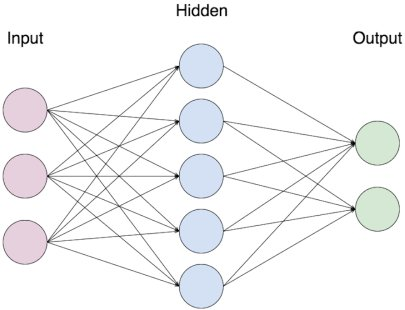

# <b><u>Implementing Neural Network from scratch </u></b>

In [ ]:
# Loading in the data
import sklearn
from sklearn.datasets import load_breast_cancer 
# Visualization
import matplotlib as mpl   
import matplotlib.pyplot as plt
import pandas as pd

# Building the network 
import numpy as np

# Progress Bar
import tqdm as tqdm

import warnings
warnings.filterwarnings("ignore") #supresses warnings

In [ ]:
# Read the csv data
filepath = "/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 3/Day 4/breastcancer.csv"
cancer_df = pd.read_csv(filepath)
cancer_df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [ ]:
cancer_df.shape

(569, 31)

In [ ]:
X_train = cancer_df.drop('target', inplace=False, axis=1) #remove 'target' column from input features
y_train = cancer_df['target'] #stores target (1 or 0) in a separate array

#since we shuffled, the index numbers were messed up, this resets them
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True)

#convert to numpy arrays with float values
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float)

#reshape y_train to make matrix multiplication possible
y_train = np.array(y_train).reshape(-1, 1)

# Initalizing Weights

In [ ]:
class Perceptron:
    def __init__(self, x, y):

        self.input = np.array(x, dtype=float) 
        self.label = np.array(y, dtype=float)
        self.weights = np.random.rand(x.shape[1], y.shape[1]) #randomly initialize the weights
        self.z = self.input@self.weights #dot product of the vectors
        self.yhat = self.sigmoid(self.z) #apply activation function

    
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_deriv(self, x):
        s = sigmoid(x)
        return s(1-s)

    def forward_prop(self):
        self.yhat = self.sigmoid(self.input @ self.weights) #@ symbol represents matrix multiplication (also works for vectors)
        return self.yhat

    def back_prop(self):
        gradient = self.input.T @ (-2.0*(self.label - self.yhat)*self.sigmoid(self.yhat))  #self.input is the x value

        self.weights -= gradient #process of finding the minimum loss

### Initializing weights in ```init``` is an important step in building a neural network as the neural network needs values to adjust so that it can create a more balanced and efficient network. Weights act as the inputs for the activation functions and are essentially the value that each neuron provides into the neural network which is constantly tweaked with each passing epoch. 

### Here we also define our activation functions, such as ```sigmoid```, which serve the purpose of interpreting the data to feed it into the next layer of the neural network. Activation functions are necessary because most data is not linear, so there need to be specialized functions that can deal with more complicated 


## Fitting the Data

In [ ]:
simple_nn = Perceptron(X_train, y_train)
training_iterations = 1000

history = [] #we will store how the mean squared error changes after each iteration in this array

def mse(yhat, y):
    sum = 0.0
    for pred, label in zip(yhat, y):
        sum += (pred-label)**2
    return sum/len(yhat)

for i in range(training_iterations):
    simple_nn.forward_prop()
    simple_nn.back_prop()
    yhat = simple_nn.forward_prop()
    history.append(mse(yhat, simple_nn.label))

    
    
yhat = simple_nn.forward_prop()
print(f'Final Mean Squared Error: {mse(yhat, simple_nn.label)}')

Final Mean Squared Error: [0.02035461]


Text(0.5, 0, 'Training Iteration')

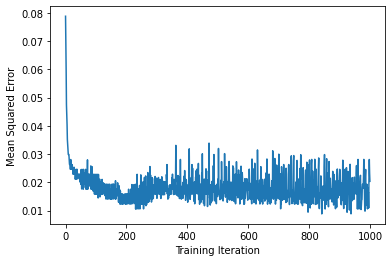

In [ ]:
plt.plot(history)
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Iteration')